In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl     
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings 
warnings.filterwarnings('ignore')   
import plotly.express as px


In [43]:
df = pd.read_csv('/Users/mathiasankri/Documents/Final project data analyst churn/archive/CustomerChurn.csv')

In [44]:
df.head()


,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
df.dtypes

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [46]:
df['Total Charges'] = df['Total Charges'].replace(' ', float('nan'))
df['Total Charges'] = df['Total Charges'].astype(float)


In [47]:
fig = px.box(df, y=['Tenure', 'Monthly Charges', 'Total Charges'], title='Boxplot of Numerical Variables')
fig.show()

In [48]:
df.describe()

,LoyaltyID,Tenure,Monthly Charges,Total Charges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,550382.651001,32.371149,64.761692,2283.300441
std,260776.118690,24.559481,30.090047,2266.771362
min,100346.000000,0.000000,18.250000,18.800000
25%,323604.500000,9.000000,35.500000,401.450000
50%,548704.000000,29.000000,70.350000,1397.475000
75%,776869.000000,55.000000,89.850000,3794.737500
max,999912.000000,72.000000,118.750000,8684.800000


In [49]:
monthly_charges_stats = df['Monthly Charges'].describe()
monthly_charges_stats

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

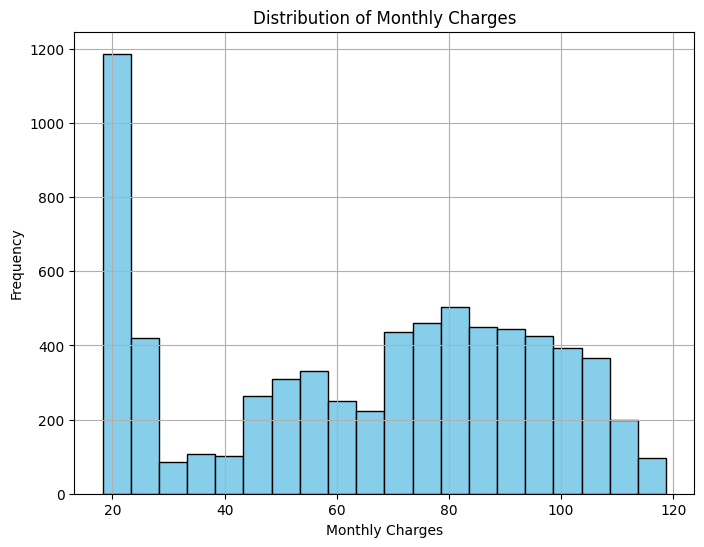

In [50]:
plt.figure(figsize=(8, 6))
plt.hist(df['Monthly Charges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

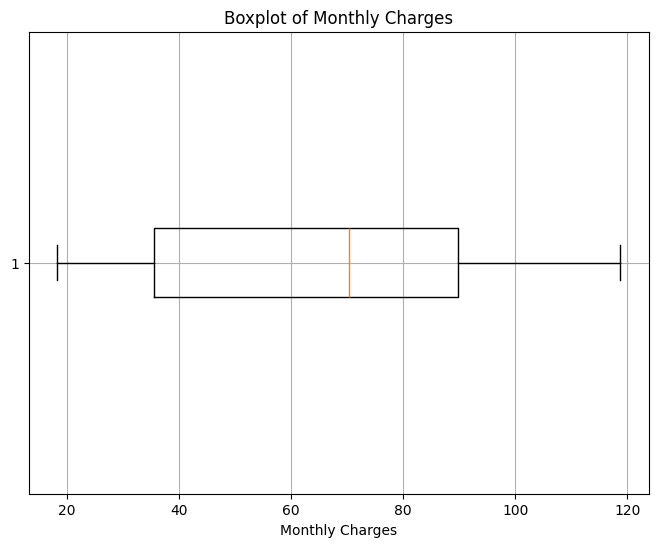

In [51]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Monthly Charges'], vert=False)
plt.title('Boxplot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.grid(True)
plt.show()

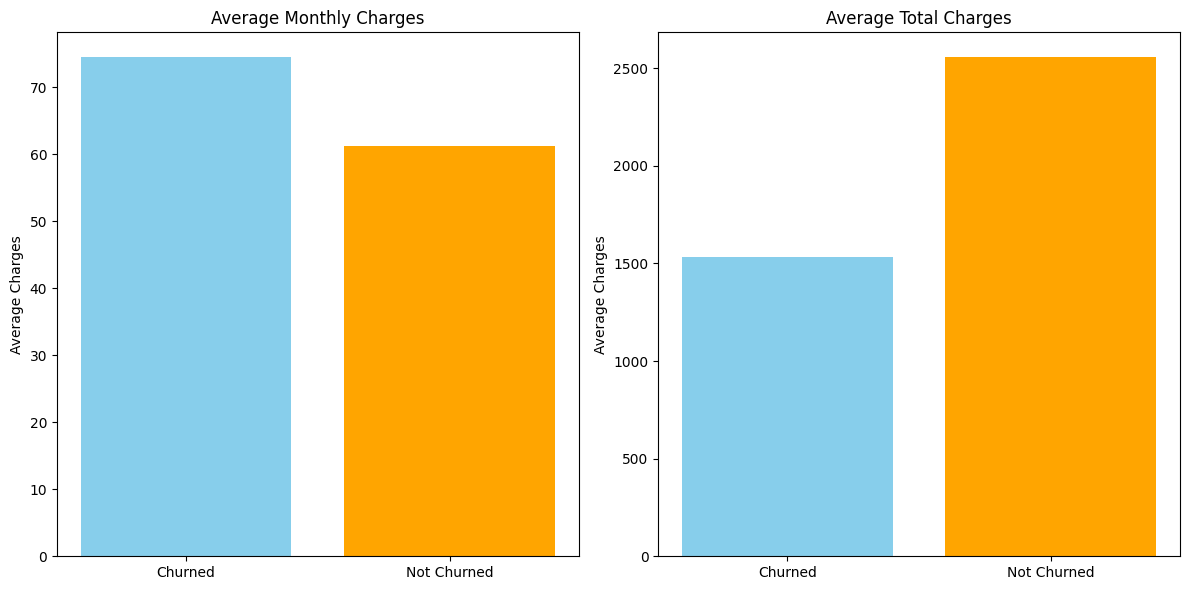

In [52]:
churned_customers = df[df['Churn'] == 'Yes']
not_churned_customers = df[df['Churn'] == 'No']
avg_monthly_charges_churned = churned_customers['Monthly Charges'].mean()
avg_monthly_charges_not_churned = not_churned_customers['Monthly Charges'].mean()
avg_total_charges_churned = churned_customers['Total Charges'].mean()
avg_total_charges_not_churned = not_churned_customers['Total Charges'].mean()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['Churned', 'Not Churned'], [avg_monthly_charges_churned, avg_monthly_charges_not_churned], color=['skyblue', 'orange'])
plt.title('Average Monthly Charges')
plt.ylabel('Average Charges')
plt.subplot(1, 2, 2)
plt.bar(['Churned', 'Not Churned'], [avg_total_charges_churned, avg_total_charges_not_churned], color=['skyblue', 'orange'])
plt.title('Average Total Charges')
plt.ylabel('Average Charges')

plt.tight_layout()
plt.show()


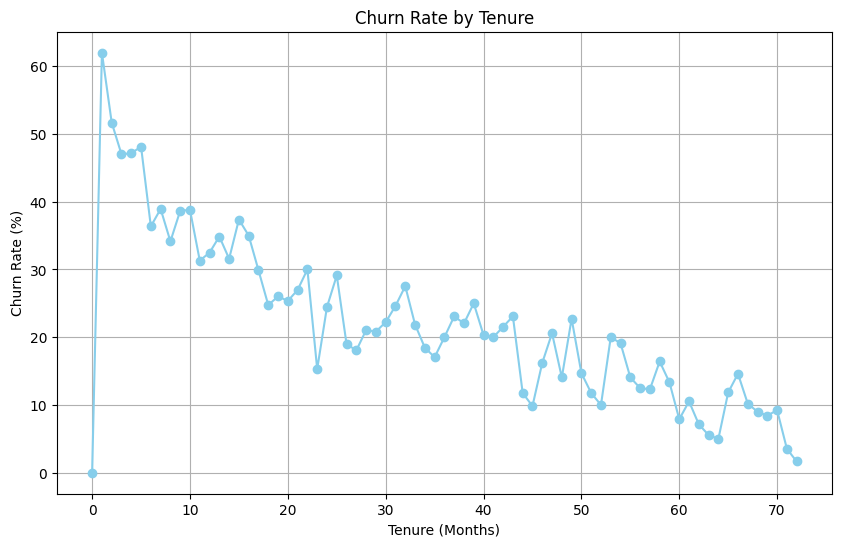

In [53]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
tenure_churn_rate = df.groupby('Tenure')['Churn'].mean() * 100
tenure_churn_rate = tenure_churn_rate.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(tenure_churn_rate['Tenure'], tenure_churn_rate['Churn'], marker='o', color='skyblue', linestyle='-')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()

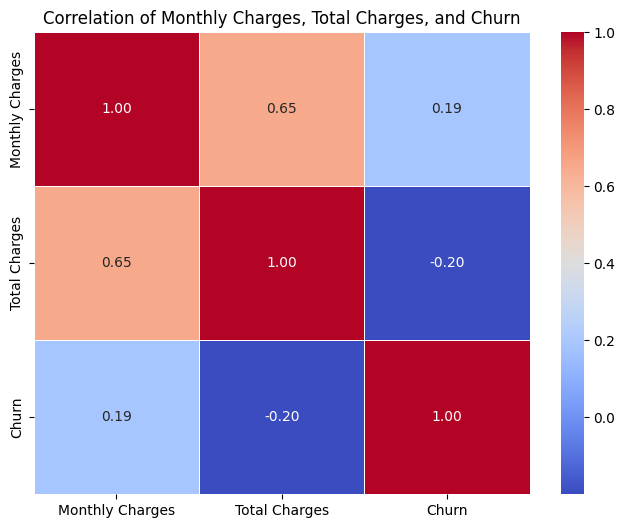

In [56]:
columns_of_interest = ['Monthly Charges', 'Total Charges', 'Churn']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Monthly Charges, Total Charges, and Churn')
plt.show()